#### Load libraries

In [52]:
from SALib.analyze import sobol ##sobol is a type of SA analysis implemented in SALib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Define Sobol Problem

In [53]:
input = {'cell_cell_repulsion_strength_cancer': 30, 'speed_cancer': 2, 'phagocytosis_rate_dead_monocytes': 25e-4,
        'transformation_rate_NLCs_monocytes': 3e-15, 'uptake_rate_cytokines_macrophages': 1,
        'attack_rate_cancer_macrophages': 5e-2, 'phagocytosis_rate_apoptotic_macrophages': 92e-4,
        'phagocytosis_rate_dead_macrophages': 92e-4, 'transformation_rate_NLCs_macrophages': 3e-16,
        'cell_cell_adhesion_strength_NLCs': 1, 'attachment_rate_NLCs': 0.001, 
        'phagocytosis_rate_dead_NLCs': 4e-4, 'speed_apoptotic': 2, 'transformation_rate_dead_apoptotic': 5e-5}


default_values = list(input.values())

#Define the problem for SALib
problem = {
    'num_vars': len(default_values),
    'names': list(input.keys()),
    'bounds': np.array([[10, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                        [60, 4, 25e-2, 6e-15, 2, 10e-2, 92e-2, 92e-2, 6e-16, 2, 0.002, 4e-2, 3, 10e-5]]).T 
}

#Number of samples N(2D+2) where N:nsamples and D:ninputs. For sobol analysis N needs to be a power of 2, if not it will give error

experimental = np.loadtxt('../../Netlogo_NLCs-CLL/filtered_fused_9patients.csv', delimiter=",", skiprows=1)
time_points = experimental[:,0]

#### Load output from simulations (viability and concentration)

In [86]:
#Read output of simulation
viability_data_node1 = pd.read_csv('../data_output/Sensitivity_analysis/results/viability_1.csv', delimiter=",")
viability_data_node2 = pd.read_csv('../data_output/Sensitivity_analysis/results/viability_2.csv', delimiter=",")
viability_data_node3 = pd.read_csv('../data_output/Sensitivity_analysis/results/viability_3.csv', delimiter=",")

concentration_data_node1 = pd.read_csv('../data_output/Sensitivity_analysis/results/concentration_1.csv', delimiter=",")
concentration_data_node2 = pd.read_csv('../data_output/Sensitivity_analysis/results/concentration_2.csv', delimiter=",")
concentration_data_node3 = pd.read_csv('../data_output/Sensitivity_analysis/results/concentration_3.csv', delimiter=",")

viability_data = pd.concat([viability_data_node1, viability_data_node2, viability_data_node3], axis = 1) 
concentration_data = pd.concat([concentration_data_node1, concentration_data_node2, concentration_data_node3], axis=1)


## Run sobol analysis

### Cell viability

In [93]:
#Sobol analysis is run by each time point and results are gathered in a matrix 
Si_S1 = []
Si_S1conf = []
Si_S2 = []
Si_S2conf = []
Si_ST = []
Si_STconf = []
for i in range(0, viability_data.shape[0]):
    Si = sobol.analyze(problem, viability_data.iloc[i].values, print_to_console=False, calc_second_order=True)
    Si_S1.append(Si['S1'])
    Si_S1conf.append(Si['S1_conf'])
    Si_S2.append(Si['S2'])
    Si_S2conf.append(Si['S2_conf'])
    Si_ST.append(Si['ST'])
    Si_STconf.append(Si['ST_conf']) 

/home/marcelo.hurtado/miniforge3/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


#### First order indices

In [94]:
Si_S1 = pd.DataFrame(Si_S1, columns=input.keys())
Si_S1conf = pd.DataFrame(Si_S1conf, columns=input.keys())
Si_ST = pd.DataFrame(Si_ST, columns=input.keys())
Si_STconf = pd.DataFrame(Si_STconf, columns=input.keys())

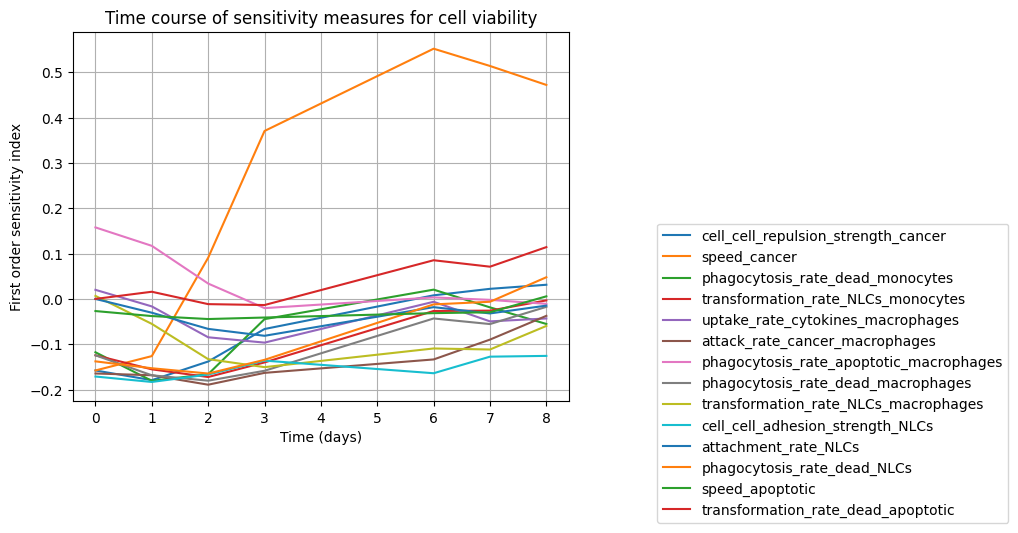

In [95]:
#### Sensitivity index First order
for param_index in range(Si_S1.shape[1]):
    plt.plot(time_points, Si_S1.iloc[:, param_index], label=Si_S1.columns[param_index])

plt.xlabel('Time (days)')
plt.ylabel('First order sensitivity index')
plt.title('Time course of sensitivity measures for cell viability')
plt.legend(loc='upper right', bbox_to_anchor=(1.9, 0.5))

#plt.ylim(0, 1)  # Set y-axis limits
plt.grid(True)
plt.show()


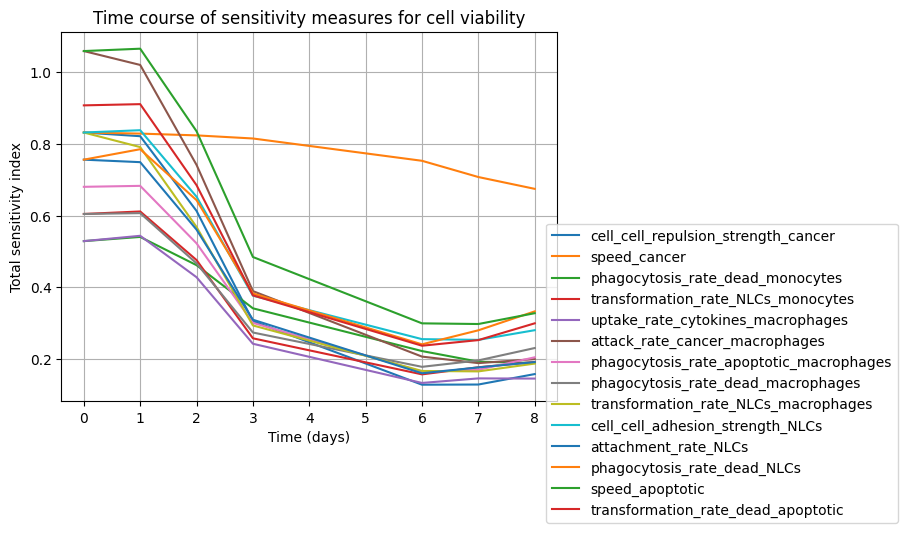

In [81]:
#### Sensitivity index Total
for param_index in range(Si_ST.shape[1]):
    plt.plot(time_points, Si_ST.iloc[:, param_index], label=Si_ST.columns[param_index])

plt.xlabel('Time (days)')
plt.ylabel('Total sensitivity index')
plt.title('Time course of sensitivity measures for cell viability')
plt.legend(loc='upper right', bbox_to_anchor=(1.7, 0.5))

plt.grid(True)
plt.show()

#### Max values per time point

In [97]:
top3_all = []
for i in range(Si_ST.shape[0]):
    top3_values = Si_ST.iloc[i].nlargest(3)  # Get the top 3 values
    colnames_top3 = top3_values.index.tolist()  # Get corresponding column names
    top3_all.extend(colnames_top3)  # Append to the list
    print(f'Time point {i}: {colnames_top3}')

unique_top3_viability = list(set(top3_all))  # Get unique values
print(f'Important parameters cell viability: {unique_top3_viability}')


Time point 0: ['attack_rate_cancer_macrophages', 'speed_apoptotic', 'transformation_rate_dead_apoptotic']
Time point 1: ['speed_apoptotic', 'attack_rate_cancer_macrophages', 'transformation_rate_dead_apoptotic']
Time point 2: ['speed_apoptotic', 'speed_cancer', 'attack_rate_cancer_macrophages']
Time point 3: ['speed_cancer', 'speed_apoptotic', 'attack_rate_cancer_macrophages']
Time point 4: ['speed_cancer', 'speed_apoptotic', 'cell_cell_adhesion_strength_NLCs']
Time point 5: ['speed_cancer', 'speed_apoptotic', 'phagocytosis_rate_dead_NLCs']
Time point 6: ['speed_cancer', 'phagocytosis_rate_dead_NLCs', 'speed_apoptotic']
Time point 7: ['cell_cell_repulsion_strength_cancer', 'speed_cancer', 'phagocytosis_rate_dead_monocytes']
Time point 8: ['cell_cell_repulsion_strength_cancer', 'speed_cancer', 'phagocytosis_rate_dead_monocytes']
Time point 9: ['cell_cell_repulsion_strength_cancer', 'speed_cancer', 'phagocytosis_rate_dead_monocytes']
Important parameters cell viability: ['cell_cell_repul

#### Second order indices

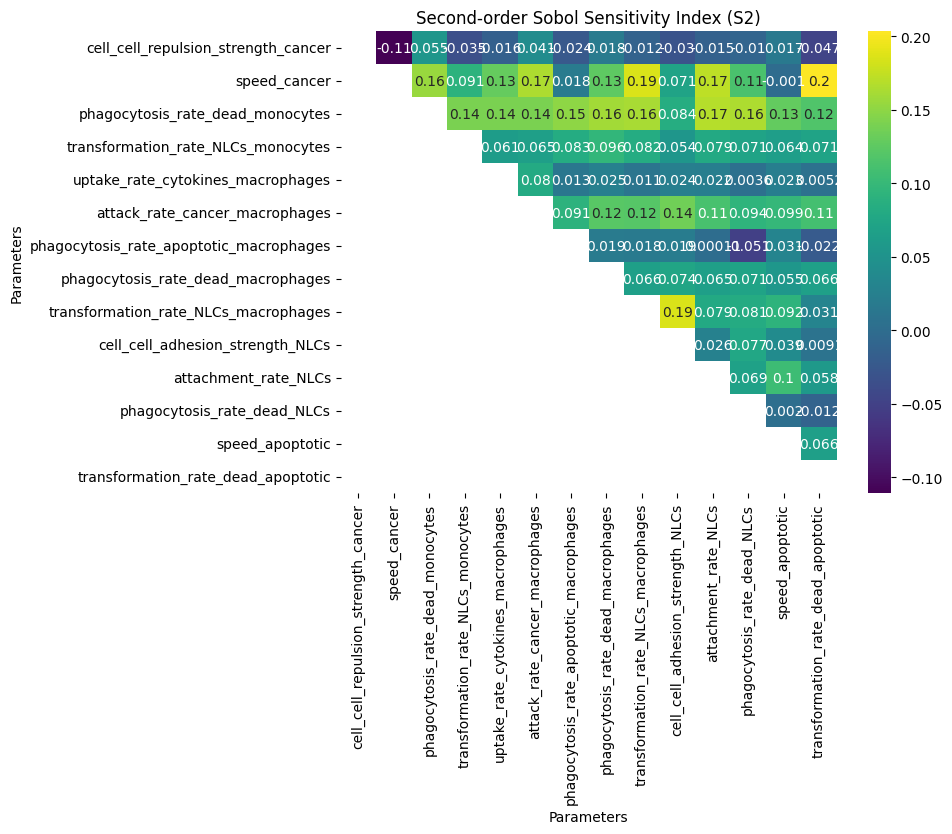

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract the S2 matrix from the Sobol analysis output
S2_matrix = Si_S2[5]

# Create a heatmap
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
sns.heatmap(S2_matrix, annot=True, cmap="viridis", xticklabels=problem['names'], yticklabels=problem['names'])

plt.xlabel("Parameters")
plt.ylabel("Parameters")
plt.title("Second-order Sobol Sensitivity Index (S2)")
plt.show()

### Cell concentration

In [98]:
#Sobol analysis is run by each time point and results are gathered in a matrix 
Si_S1 = []
Si_S1conf = []
Si_S2 = []
Si_S2conf = []
Si_ST = []
Si_STconf = []
for i in range(0, concentration_data.shape[0]):
    Si = sobol.analyze(problem, concentration_data.iloc[i].values, print_to_console=False, calc_second_order=True)
    Si_S1.append(Si['S1'])
    Si_S1conf.append(Si['S1_conf'])
    Si_S2.append(Si['S2'])
    Si_S2conf.append(Si['S2_conf'])
    Si_ST.append(Si['ST'])
    Si_STconf.append(Si['ST_conf']) 

/home/marcelo.hurtado/miniforge3/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


#### First order indices

In [99]:
Si_S1 = pd.DataFrame(Si_S1, columns=input.keys())
Si_S1conf = pd.DataFrame(Si_S1conf, columns=input.keys())
Si_ST = pd.DataFrame(Si_ST, columns=input.keys())
Si_STconf = pd.DataFrame(Si_STconf, columns=input.keys())

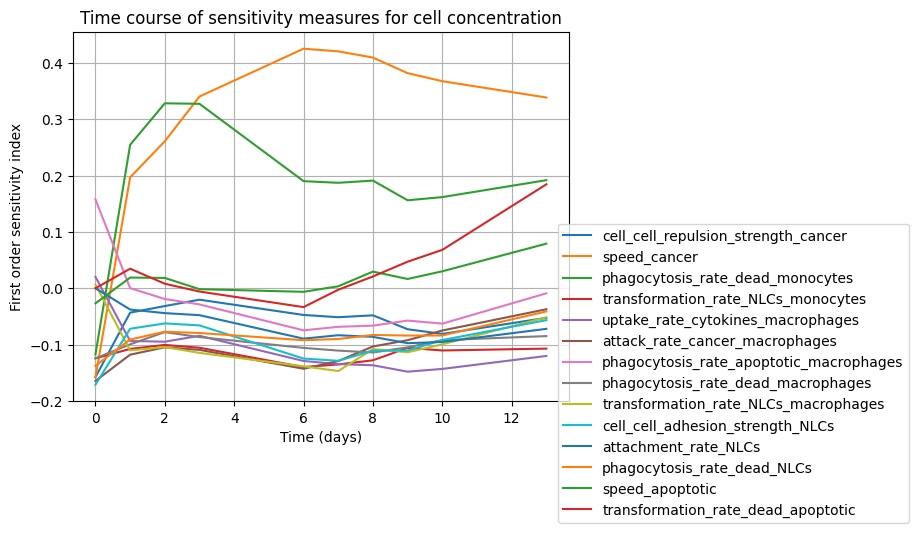

In [63]:
#### Sensitivity index First order
for param_index in range(Si_S1.shape[1]):
    plt.plot(time_points, Si_S1.iloc[:, param_index], label=Si_S1.columns[param_index])

plt.xlabel('Time (days)')
plt.ylabel('First order sensitivity index')
plt.title('Time course of sensitivity measures for cell concentration')
plt.legend(loc='upper right', bbox_to_anchor=(1.7, 0.5))

plt.grid(True)
plt.show()

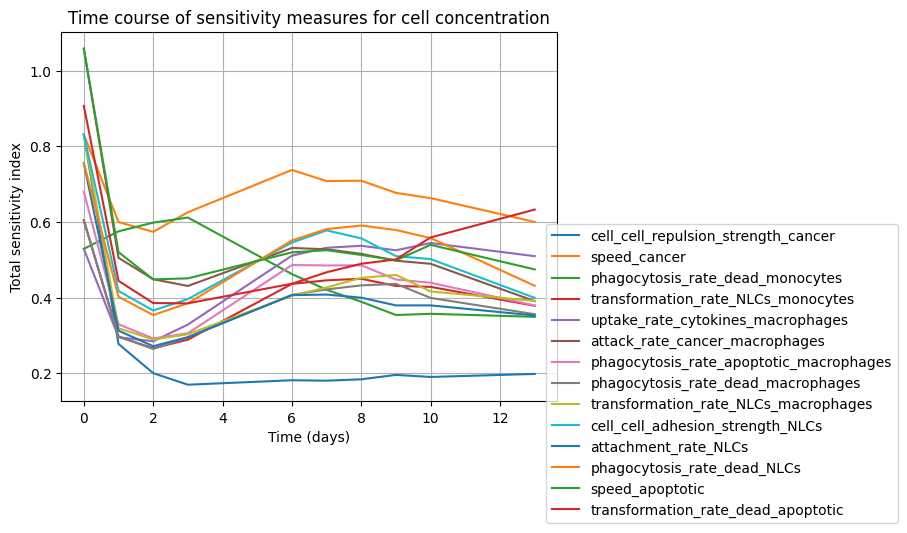

In [64]:
#### Sensitivity index Total
for param_index in range(Si_ST.shape[1]):
    plt.plot(time_points, Si_ST.iloc[:, param_index], label=Si_ST.columns[param_index])

plt.xlabel('Time (days)')
plt.ylabel('Total sensitivity index')
plt.title('Time course of sensitivity measures for cell concentration')

plt.legend(loc='upper right', bbox_to_anchor=(1.7, 0.5))

plt.grid(True)
plt.show()

#### Max values per time point

In [101]:
top3_all = []
for i in range(Si_ST.shape[0]):
    top3_values = Si_ST.iloc[i].nlargest(3)  # Get the top 3 values
    colnames_top3 = top3_values.index.tolist()  # Get corresponding column names
    top3_all.extend(colnames_top3)  # Append to the list
    print(f'Time point {i}: {colnames_top3}')

unique_top3_concentration = list(set(top3_all))  # Get unique values
print(f'Important parameters cell concentration: {unique_top3_concentration}')

Time point 0: ['attack_rate_cancer_macrophages', 'speed_apoptotic', 'transformation_rate_dead_apoptotic']
Time point 1: ['speed_cancer', 'phagocytosis_rate_dead_monocytes', 'speed_apoptotic']
Time point 2: ['phagocytosis_rate_dead_monocytes', 'speed_cancer', 'attack_rate_cancer_macrophages']
Time point 3: ['speed_cancer', 'phagocytosis_rate_dead_monocytes', 'speed_apoptotic']
Time point 4: ['speed_cancer', 'phagocytosis_rate_dead_NLCs', 'cell_cell_adhesion_strength_NLCs']
Time point 5: ['speed_cancer', 'phagocytosis_rate_dead_NLCs', 'cell_cell_adhesion_strength_NLCs']
Time point 6: ['speed_cancer', 'phagocytosis_rate_dead_NLCs', 'cell_cell_adhesion_strength_NLCs']
Time point 7: ['speed_cancer', 'phagocytosis_rate_dead_NLCs', 'uptake_rate_cytokines_macrophages']
Time point 8: ['speed_cancer', 'transformation_rate_dead_apoptotic', 'phagocytosis_rate_dead_NLCs']
Time point 9: ['transformation_rate_dead_apoptotic', 'speed_cancer', 'uptake_rate_cytokines_macrophages']
Important parameters c

#### Second order indices

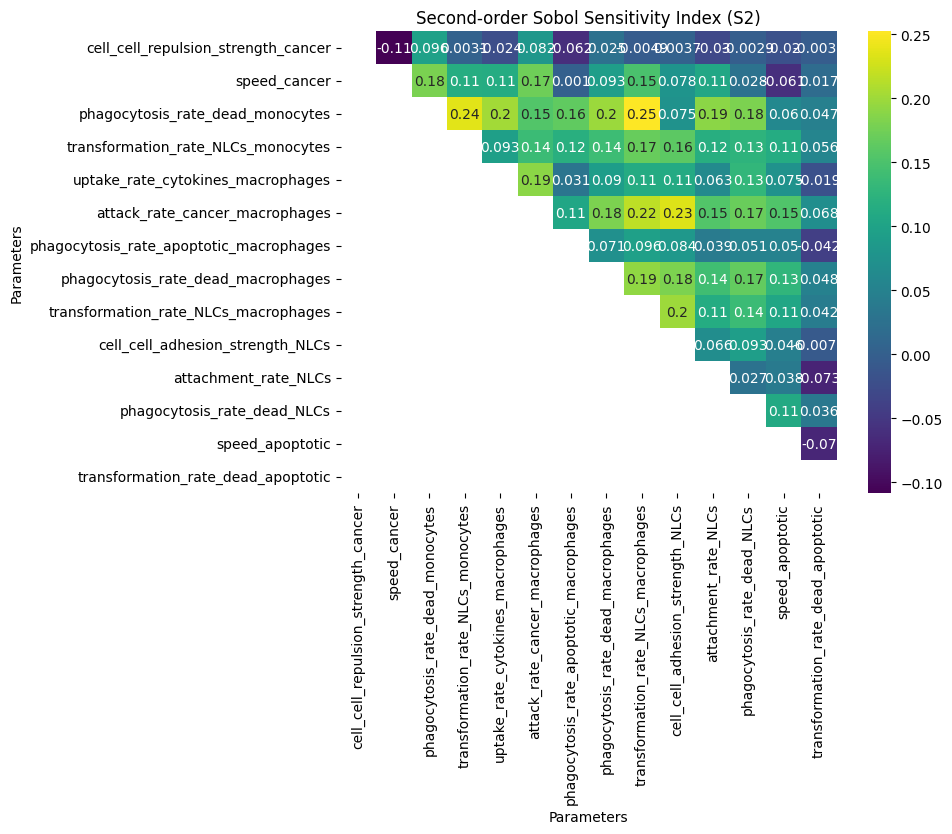

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract the S2 matrix from the Sobol analysis output
S2_matrix = Si_S2[3]

# Create a heatmap
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
sns.heatmap(S2_matrix, annot=True, cmap="viridis", xticklabels=problem['names'], yticklabels=problem['names'])

plt.xlabel("Parameters")
plt.ylabel("Parameters")
plt.title("Second-order Sobol Sensitivity Index (S2)")
plt.show()

In [107]:
parameters = unique_top3_viability + unique_top3_concentration
parameters_final = list(set(parameters))
print(parameters_final)

['cell_cell_repulsion_strength_cancer', 'phagocytosis_rate_dead_monocytes', 'speed_cancer', 'phagocytosis_rate_dead_NLCs', 'cell_cell_adhesion_strength_NLCs', 'transformation_rate_dead_apoptotic', 'speed_apoptotic', 'attack_rate_cancer_macrophages', 'uptake_rate_cytokines_macrophages']
